In [1]:
from pycaret.classification import * 
from pycaret.datasets import get_data

In [3]:
diabetes = get_data('diabetes')


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
exp_clf = setup(diabetes, target='Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8705
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.7598,0.8174,0.6096,0.6864,0.6382,0.4603
1,Gradient Boosting Classifier,0.7579,0.8282,0.6038,0.6721,0.6299,0.4524
2,Ridge Classifier,0.7503,0,0.5342,0.6871,0.5888,0.4172
3,CatBoost Classifier,0.7487,0.8233,0.5988,0.6611,0.6218,0.4357
4,Extreme Gradient Boosting,0.7486,0.8274,0.5775,0.667,0.6139,0.4298
5,Logistic Regression,0.7485,0.8058,0.5453,0.6797,0.5895,0.4163
6,Ada Boost Classifier,0.7468,0.8124,0.5944,0.6596,0.6191,0.4315
7,Linear Discriminant Analysis,0.7447,0.8148,0.5395,0.6743,0.5882,0.4092
8,Random Forest Classifier,0.7412,0.7813,0.524,0.665,0.5826,0.3998
9,Extra Trees Classifier,0.7281,0.7968,0.5129,0.6401,0.5618,0.3704


In [6]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.8015,0.6842,0.5909,0.6341,0.4122
1,0.7222,0.8301,0.5789,0.6111,0.5946,0.3836
2,0.8148,0.8647,0.5263,0.9091,0.6667,0.5507
3,0.6852,0.7083,0.4737,0.5625,0.5143,0.2839
4,0.8148,0.8617,0.6316,0.8000,0.7059,0.5735
5,0.8704,0.9459,0.7368,0.8750,0.8000,0.7051
6,0.6852,0.8030,0.6316,0.5455,0.5854,0.3338
7,0.7170,0.7841,0.4444,0.6154,0.5161,0.3234
8,0.7925,0.8111,0.7778,0.6667,0.7179,0.5553
9,0.7736,0.7635,0.6111,0.6875,0.6471,0.4812


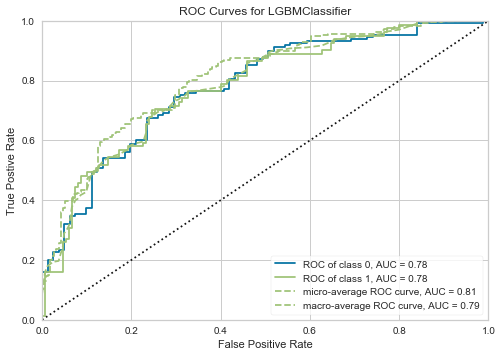

In [7]:
plot_model(lgbm)

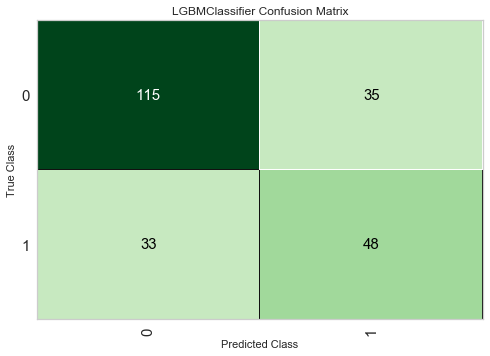

In [8]:
plot_model(lgbm,'confusion_matrix')

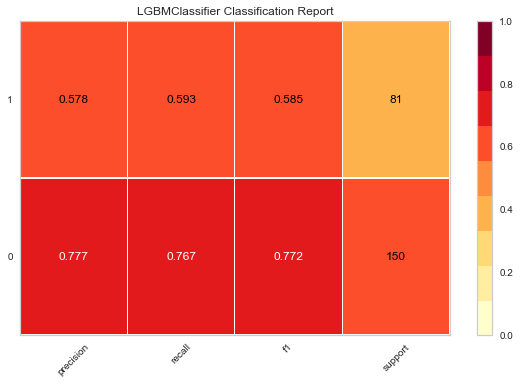

In [9]:
plot_model(lgbm,'class_report')

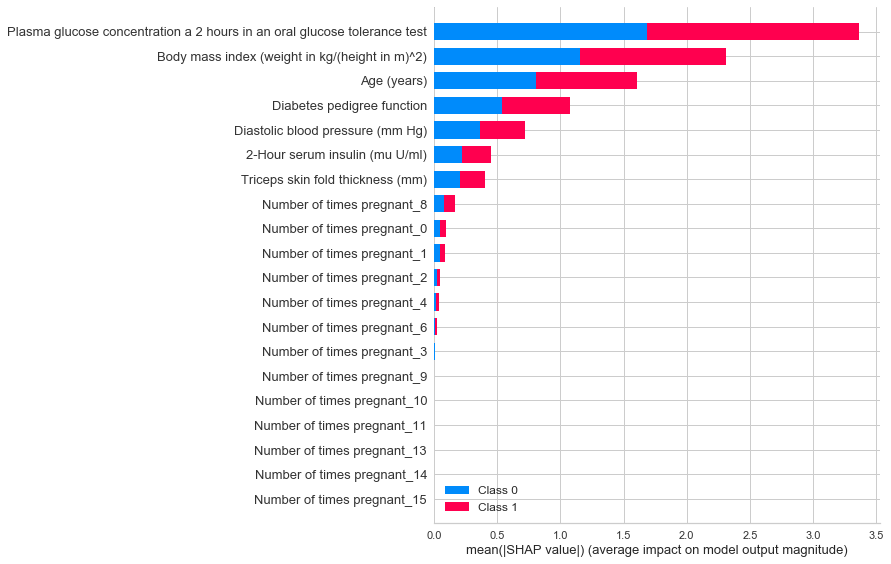

In [10]:
interpret_model(lgbm)

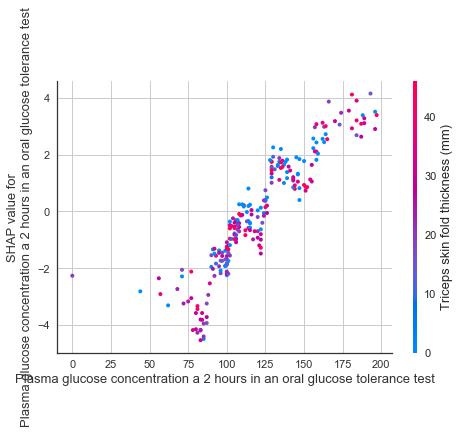

In [11]:
interpret_model(lgbm, plot = 'correlation')

In [12]:
interpret_model(lgbm, plot = 'reason', observation = 0) 

In [13]:
predictions = predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.7056,0.7811,0.5926,0.5783,0.5854,0.3572


In [14]:
finalize_model(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8705, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
save_model(lgbm, 'diabetes_lgbm')

Transformation Pipeline and Model Succesfully Saved


In [17]:
model = load_model('diabetes_lgbm')

Transformation Pipeline and Model Sucessfully Loaded


In [18]:
model

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagori...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()),
                 ('dummy', Dummify(target='Class variable')),
                 ('fix_perfect', Remove_100(target='Class variable')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=8705, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]

In [28]:
save_experiment(experiment_name = 'my_first_experiment')

Experiment Succesfully Saved
